Setup

This image is: <class 'numpy.ndarray'> with dimensions: (1870, 3648, 3)


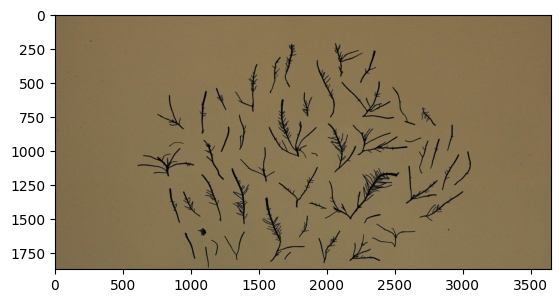

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# Pick one of the cropped images
image = cv2.imread('./cropped_photos/Lithothrix_original_cropped.jpg')

# image = cv2.imread('./original_photos/Lithothrix.aspergillum_SC_P_SA_8Mar2024_3.jpg')
# image = cv2.imread('./cropped_photos/Laurencia.pacifica_CS_P_19Feb2024_1_cropped.png')
# image = cv2.imread('./cropped_photos/Laurencia.pacifica_CS_SA_19Feb2024_1_cropped.png')
# image = cv2.imread('./cropped_photos/Plocamium.pacificum_LC_P_SA_26Jan2024_2_cropped.jpg')

print('This image is:', type(image), 
      'with dimensions:', image.shape)

image_copy = np.copy(image)
plt.imshow(image_copy)

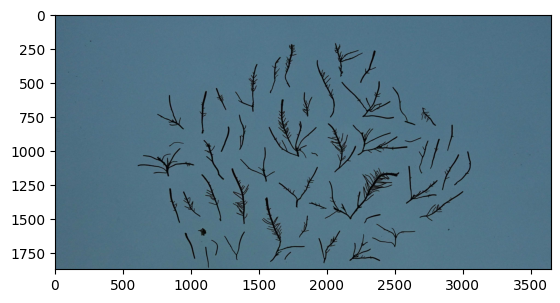

In [2]:
# Convert image to RGB, it will now appear as expected
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

Create Black/White Image

In [3]:
# Create the range of colors that you want to *filter out*
# The idea here is to get the darkest shade in the background
# and everything lighter, all the way up to pure white.

# Darkest blue for background
lower_blue = np.array([1,1,1])
# Lightest blue for background
upper_blue = np.array([255,255,255])

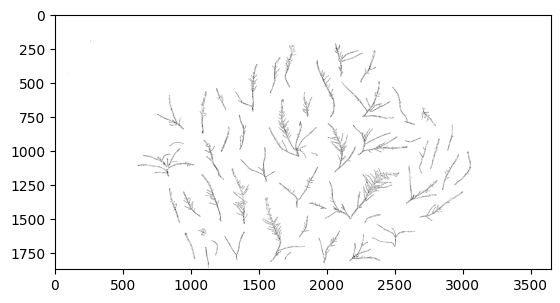

In [4]:
# The mask turns everything in between the upper/lower bounds to white
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
# The cmap parameter applies a grayscale to the pixels that don't fit
# into the mask's range
plt.imshow(mask, cmap='gray')

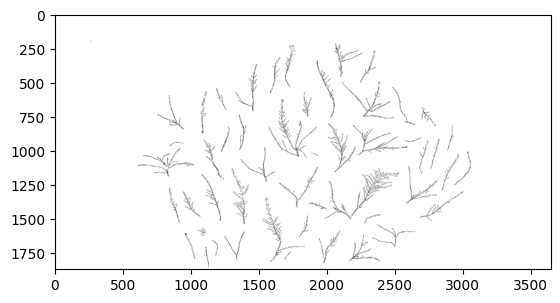

In [5]:
# Make a copy of the original image and apply the mask to it. 
# You can choose what color to set the background to using the second line
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [255, 255, 255]
masked_image[masked_image != 255] = 0
plt.imshow(masked_image)

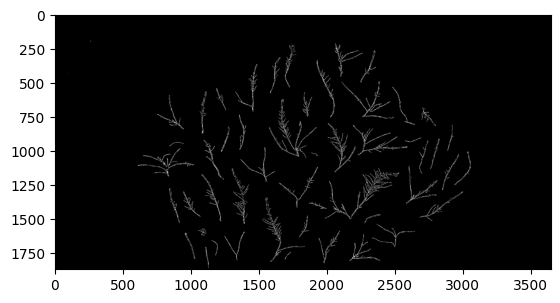

In [6]:
# Change to black background
final_image = cv2.bitwise_not(masked_image)
plt.imshow(final_image)

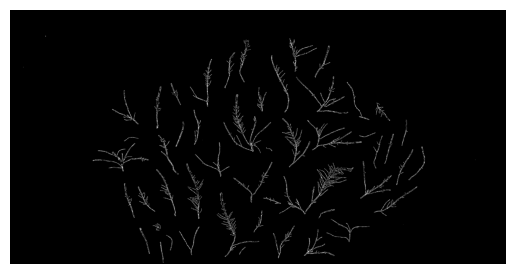

In [7]:
# Display final image
# Set plot settings
# Selecting the axis-X making the bottom and top axes False. 
plt.tick_params(axis='x', which='both', bottom=False, 
                top=False, labelbottom=False) 
  
# Selecting the axis-Y making the right and left axes False 
plt.tick_params(axis='y', which='both', right=False, 
                left=False, labelleft=False) 
  
# Iterating over all the axes in the figure 
# and make the Spines Visibility as False 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 

plt.imshow(final_image)

In [8]:
# count_bw_pixels: Takes in a black/white image as numpy array and counts the black or white pixels
def count_bw_pixels(img, color):
    count = 0
    if color == 'black':
        for row in img:
            for col in row:
                if col[0] != 255 and col[1] != 255 and col[2] != 255:
                    count = count + 1
    elif color == 'white':
        for row in img:
            for col in row:
                if col[0] == 255 and col[1] == 255 and col[2] == 255:
                    count = count + 1

    return count

In [9]:
# Count black/white pixels
black_pix = count_bw_pixels(final_image, 'black')
print("Non-White Pixels:", black_pix)
white_pix = count_bw_pixels(final_image, 'white')
print("White Pixels:", white_pix)
print("Total Pixles:", (black_pix + white_pix))

Non-White Pixels: 6734764
White Pixels: 86996
Total Pixles: 6821760


Check Given Black/White Image

In [10]:
ex_image = cv2.imread('./black-white_photos/Lithothrix_BW_cropped.jpg')
# Count black/white pixels
ex_black_pix = count_bw_pixels(ex_image, 'black')
print("Non-White Pixels:", ex_black_pix)
ex_white_pix = count_bw_pixels(ex_image, 'white')
print("White Pixels:", ex_white_pix)
print("Total Pixels:", (ex_black_pix + ex_white_pix))

Non-White Pixels: 6735875
White Pixels: 85885
Total Pixels: 6821760


Compare Converted Image to Example Image

In [11]:
# Given measured and actual values, returns percent error
def calc_perc_error(measured, actual):
    return abs(round((measured - actual) / actual * 100, 3))

In [12]:
print("Percent Error:", calc_perc_error(white_pix, ex_white_pix))

Percent Error: 1.294
